# 1. Initial settings


In [1]:
cd ..

/


In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
cd 'content/drive/MyDrive/ColabNotebooks/Kaggle/BikeSharing'

/content/drive/MyDrive/ColabNotebooks/Kaggle/BikeSharing


In [4]:
#!pip install kaggle

In [5]:
#import os
#os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/Kaggle/"

In [6]:
#!kaggle competitions download -c bike-sharing-demand

# 2. Import danych 

In [7]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm

import matplotlib.pylab as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from pylab import rcParams  
plt.rcParams["figure.figsize"] = (20, 7)

%matplotlib inline

from datetime import datetime

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
df_train = pd.read_csv('data/train_BS.csv', sep=',')
df_train['is_train'] = True
df_test = pd.read_csv('data/test_BS.csv', sep=',')
df_test['is_train'] = False
df = pd.concat([df_train, df_test]) 
pd.set_option('max_colwidth', 400)

In [9]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,is_train
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,True
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,True
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,True
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,True
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,True


In [10]:
print('\n-------- BIKE SHARING DATASET INFO --------\n')
df.info() 
print('\n-- SHAPE: TRAIN / TEST / CONCAT. DATASET --\n')
print(df_train.shape, df_test.shape, df.shape)


-------- BIKE SHARING DATASET INFO --------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
 12  is_train    17379 non-null  bool   
dtypes: bool(1), float64(6), int64(5), object(1)
memory usage: 1.7+ MB

-- SHAPE: TRAIN / TEST / CONCAT. DATASET --

(10886, 13) (6493, 10) (17379, 13)


---> No missing values ?! 😀

---> Missing columns in the test set: `casual`, `registered` & `count`











In [11]:
#dropping columns: casual, registered
df = df.drop(columns=(['casual', 'registered']), axis=1)
df.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,is_train
7829,2012-06-06 14:00:00,2,0,1,1,26.24,31.060,38,0.0000,302.0,True
7352,2012-05-05 17:00:00,2,0,0,2,27.88,31.820,65,19.9995,502.0,True
5700,2012-01-12 16:00:00,1,0,1,1,18.86,22.725,67,12.9980,281.0,True
4837,2011-11-14 15:00:00,4,0,1,1,26.24,31.060,44,22.0028,195.0,True
10682,2012-12-11 12:00:00,4,0,1,2,14.76,15.910,53,30.0026,226.0,True


In [12]:
for column in df:
    unique_vals = np.unique(df[column].astype(str))
    nr_values = len(unique_vals)
    if nr_values < 30:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature datetime :17379
The number of values for feature season :4 -- ['1' '2' '3' '4']
The number of values for feature holiday :2 -- ['0' '1']
The number of values for feature workingday :2 -- ['0' '1']
The number of values for feature weather :4 -- ['1' '2' '3' '4']
The number of values for feature temp :50
The number of values for feature atemp :65
The number of values for feature humidity :89
The number of values for feature windspeed :30
The number of values for feature count :823
The number of values for feature is_train :2 -- ['False' 'True']


# 3. PRE Processing

## Datetime parsing


In [13]:
print('\n Data Types:')
print(df.dtypes)


 Data Types:
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count         float64
is_train         bool
dtype: object


Column `datetime` is an `object` --> parsing required:

In [14]:
df['datetime'] = pd.to_datetime(df['datetime'], dayfirst=True)

In [15]:
print(df.dtypes)

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                float64
is_train                bool
dtype: object


In [16]:
#checking whether the training and test data overlap:
df.groupby('is_train').datetime.agg([min, max]).reset_index()  

,is_train,min,max
0,False,2011-01-20,2012-12-31 23:00:00
1,True,2011-01-01,2012-12-19 23:00:00


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   holiday     17379 non-null  int64         
 3   workingday  17379 non-null  int64         
 4   weather     17379 non-null  int64         
 5   temp        17379 non-null  float64       
 6   atemp       17379 non-null  float64       
 7   humidity    17379 non-null  int64         
 8   windspeed   17379 non-null  float64       
 9   count       10886 non-null  float64       
 10  is_train    17379 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(4), int64(5)
memory usage: 1.5 MB


### datetime index i resample !!

In [18]:
#using .resample() to get rid of possible duplicates:
df_agg = df.resample('1h', on='datetime').mean()             

In [19]:
df_agg.reset_index()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,is_train
0,2011-01-01 00:00:00,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0000,16.0,1.0
1,2011-01-01 01:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0000,40.0,1.0
2,2011-01-01 02:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0000,32.0,1.0
3,2011-01-01 03:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0000,13.0,1.0
4,2011-01-01 04:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
17539,2012-12-31 19:00:00,1.0,0.0,1.0,2.0,10.66,12.880,60.0,11.0014,NaN,0.0
17540,2012-12-31 20:00:00,1.0,0.0,1.0,2.0,10.66,12.880,60.0,11.0014,NaN,0.0
17541,2012-12-31 21:00:00,1.0,0.0,1.0,1.0,10.66,12.880,60.0,11.0014,NaN,0.0
17542,2012-12-31 22:00:00,1.0,0.0,1.0,1.0,10.66,13.635,56.0,8.9981,NaN,0.0


In [20]:
df_agg.shape, df.shape

((17544, 10), (17379, 11))

In [21]:
#there are differences in the shapes so I check up for missing values
len(df_agg[df_agg.is_train.isnull()])

165

In [22]:
df_agg.isnull().sum()

season         165
holiday        165
workingday     165
weather        165
temp           165
atemp          165
humidity       165
windspeed      165
count         6658
is_train       165
dtype: int64

In [23]:
df_agg["count"][~df_agg["count"].isna()].\
agg([min, max, 
     lambda x: len([y for y in x if y == 0])/len(x),])           # %value '0' in the whole datast

min           1.0
max         977.0
<lambda>      0.0
Name: count, dtype: float64

In [24]:
df_new = df_agg[~df_agg.is_train.isnull()].reset_index()
df_new.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,is_train
0,2011-01-01 00:00:00,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0,16.0,1.0
1,2011-01-01 01:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,40.0,1.0
2,2011-01-01 02:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,32.0,1.0
3,2011-01-01 03:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0,13.0,1.0
4,2011-01-01 04:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0,1.0,1.0


In [25]:
df_agg.shape, df_new.shape

((17544, 10), (17379, 11))

In [26]:
#basic feature creation:

def basic_feature_engineering(df):
    df["day"] = df["datetime"].dt.day
    df["week"] = df["datetime"].dt.week
    df["month"] = df["datetime"].dt.month
    df["year"] = df["datetime"].dt.year
    df["hour"] = df["datetime"].dt.hour
    df['date'] = df['datetime'].dt.date
    df["dayofweek"] = df["datetime"].dt.dayofweek
    df["day_name"] = df['datetime'].dt.day_name() 
    df["dayofyear"] = df["datetime"].dt.dayofyear
  
    df_train = df[ df["count"].notnull() ]
    df_test = df[ df["count"].isnull() ]

    return df

In [27]:
df_new = basic_feature_engineering(df_new)
df_new.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,is_train,day,week,month,year,hour,date,dayofweek,day_name,dayofyear
10790,2012-03-30 17:00:00,2.0,0.0,1.0,2.0,16.40,20.455,62.0,15.0013,NaN,0.0,30,13,3,2012,17,2012-03-30,4,Friday,90
6464,2011-10-01 22:00:00,4.0,0.0,0.0,2.0,14.76,17.425,93.0,15.0013,70.0,1.0,1,39,10,2011,22,2011-10-01,5,Saturday,274
13433,2012-07-18 22:00:00,3.0,0.0,1.0,1.0,31.16,35.605,58.0,6.0032,288.0,1.0,18,29,7,2012,22,2012-07-18,2,Wednesday,200
5669,2011-08-29 16:00:00,3.0,0.0,1.0,1.0,29.52,32.575,42.0,11.0014,NaN,0.0,29,35,8,2011,16,2011-08-29,0,Monday,241
2418,2011-04-15 16:00:00,2.0,1.0,0.0,1.0,21.32,25.000,55.0,32.9975,243.0,1.0,15,15,4,2011,16,2011-04-15,4,Friday,105


In [28]:
df_new.groupby(['year', 'month','season']).date.agg([min, max]).sort_values(by="min").reset_index()

,year,month,season,min,max
0,2011,1,1.0,2011-01-01,2011-01-31
1,2011,2,1.0,2011-02-01,2011-02-28
2,2011,3,1.0,2011-03-01,2011-03-20
3,2011,3,2.0,2011-03-21,2011-03-31
4,2011,4,2.0,2011-04-01,2011-04-30
5,2011,5,2.0,2011-05-01,2011-05-31
6,2011,6,2.0,2011-06-01,2011-06-20
7,2011,6,3.0,2011-06-21,2011-06-30
8,2011,7,3.0,2011-07-01,2011-07-31
9,2011,8,3.0,2011-08-01,2011-08-31


In [29]:
# season correction
df_new['season_fixed'] = df_new.apply(lambda x: '4_winter' if x['season']==1
                              else '1_spring' if x['season']==2
                              else '2_summer' if x['season']==3 
                              else '3_fall' if x['season']==4
                              else np.nan, 
                              axis=1)

In [30]:
df_new.groupby(['year', 'month','season', 'season_fixed']).date.agg([min, max]).unstack('year', 'season_fixed')


min                     max            
year                             2011        2012        2011        2012
month season season_fixed                                                
1     1.0    4_winter      2011-01-01  2012-01-01  2011-01-31  2012-01-31
2     1.0    4_winter      2011-02-01  2012-02-01  2011-02-28  2012-02-29
3     1.0    4_winter      2011-03-01  2012-03-01  2011-03-20  2012-03-20
      2.0    1_spring      2011-03-21  2012-03-21  2011-03-31  2012-03-31
4     2.0    1_spring      2011-04-01  2012-04-01  2011-04-30  2012-04-30
5     2.0    1_spring      2011-05-01  2012-05-01  2011-05-31  2012-05-31
6     2.0    1_spring      2011-06-01  2012-06-01  2011-06-20  2012-06-20
      3.0    2_summer      2011-06-21  2012-06-21  2011-06-30  2012-06-30
7     3.0    2_summer      2011-07-01  2012-07-01  2011-07-31  2012-07-31
8     3.0    2_summer      2011-08-01  2012-08-01  2011-08-31  2012-08-31
9     3.0    2_summer      2011-09-01  2012-09-01  2011-09-22  2012-09-22
      4.0    3_fall        2011-09-23  2012-09-23  2011-09-30  2012-09-30
10    4.0    3_fall        2011-10-01  2012-10-01  2011-10-31  2012-10-31
11    4.0    3_fall        2011-11-01  2012-11-01  2011-11-30  2012-11-30
12    1.0    4_winter      2011-12-21  2012-12-21  2011-12-31  2012-12-31
      4.0    3_fall        2011-12-01  2012-12-01  2011-12-20  2012-12-20

# 4. EDA


In [31]:
df2 = df_new.copy()

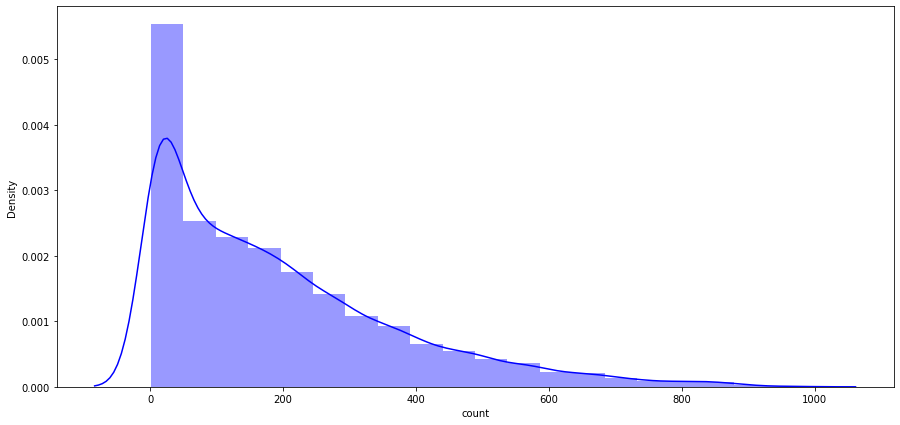

In [32]:
plt.rcParams["figure.figsize"] = (15, 7)
sns.distplot(df2['count'], bins=20, color='b')

--> Skewed distribution: further on, smoothing may be required 🤔

In [33]:
fig = px.box(df2, x="hour", y='count', )
fig.show()

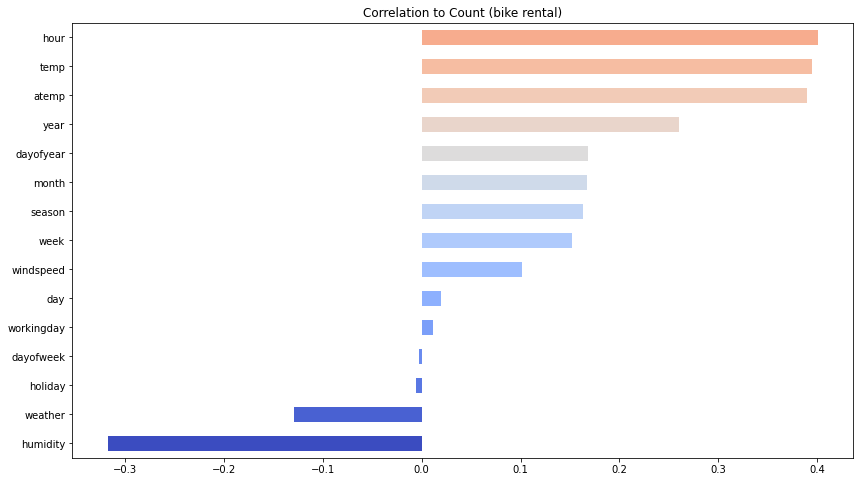

registered    0.970948
casual        0.690414
temp          0.394454
atemp         0.389784
season        0.163439
windspeed     0.101369
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
is_train           NaN
dtype: float64


In [34]:
n_col = len(df2[df2['is_train']==True].columns)
colors = cm.coolwarm(np.linspace(0, 1, n_col))

df2[df2['is_train']==True].drop('is_train', axis=1).drop('count', axis=1).corrwith(df2[df2['is_train']==True].drop('is_train', axis=1)['count']).\
                                                                                sort_values(ascending=True).plot( kind='barh', color=colors, figsize=(14, 8))
plt.title('Correlation to Count (bike rental)')
plt.show()

print(df_train.drop('count', axis=1).corrwith(df_train['count']).sort_values(ascending=False))

## YEAR / MONTH / DAY / HOUR

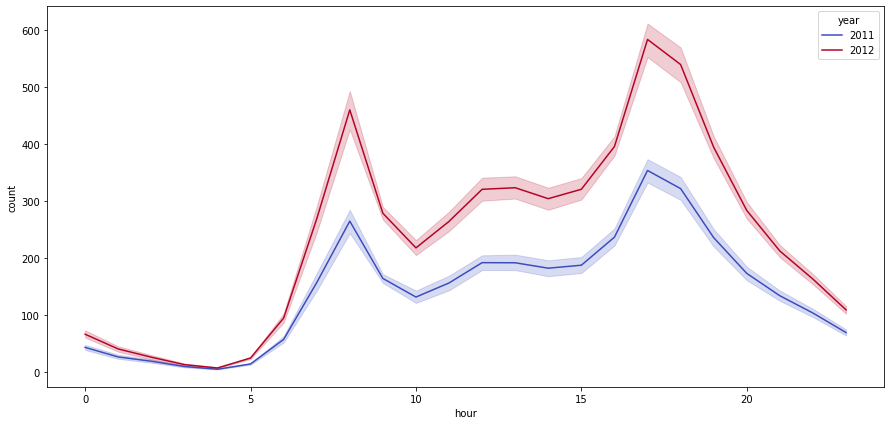

In [35]:
sns.lineplot(data=df2[df2['is_train']==True], x="hour", y="count", hue="year", palette="coolwarm")

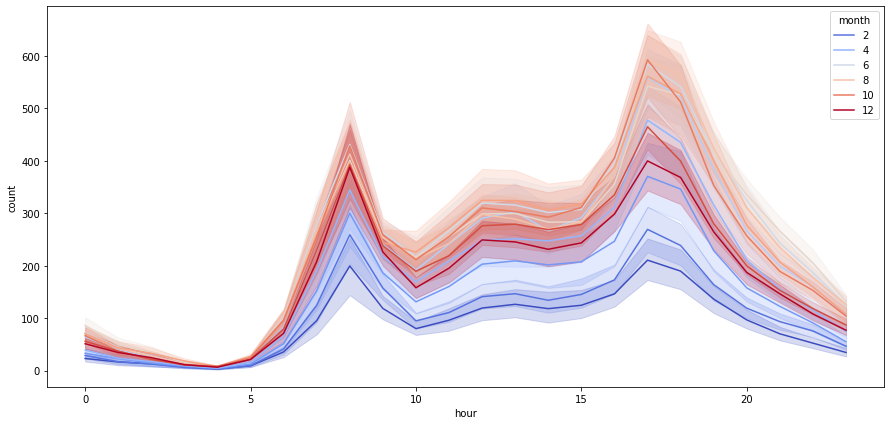

In [36]:
sns.lineplot(data=df2[df2['is_train']==True], x="hour", y="count", hue="month", palette="coolwarm")

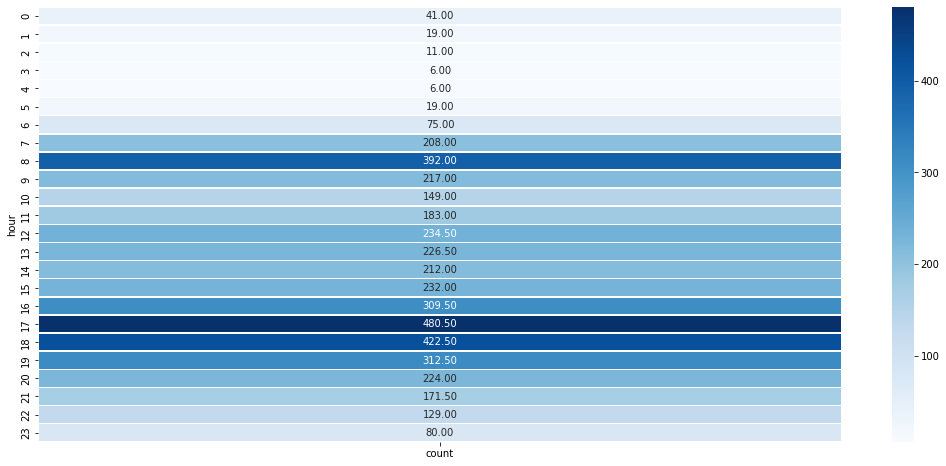

In [37]:
plt.figure(figsize=(18,8))
df_hour_count = df2.groupby('hour')[['count']].median()
df_hour_count = df_hour_count.sort_values('hour', ascending=True)
sns.heatmap(df_hour_count, annot=True, fmt='.2f', linewidths=.5, cmap="Blues"); 

-->  New variable to cosider: `['RUSH_HOUR'] `

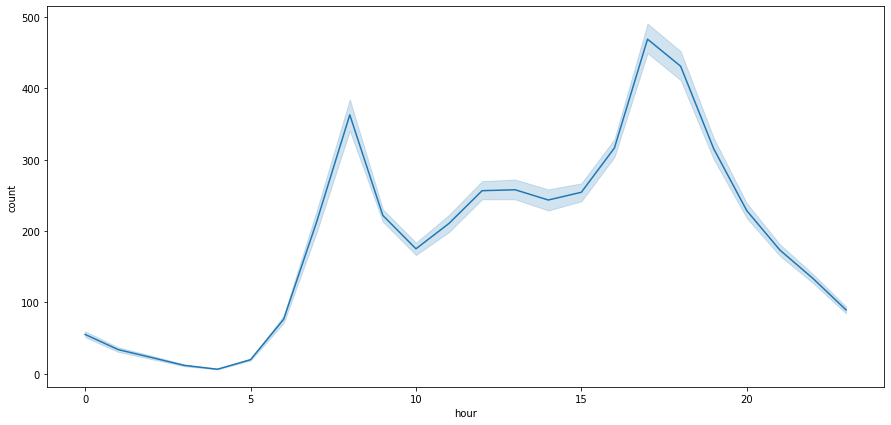

In [38]:
sns.lineplot(data=df2[df2['is_train']==True], x="hour", y="count", palette="coolwarm")

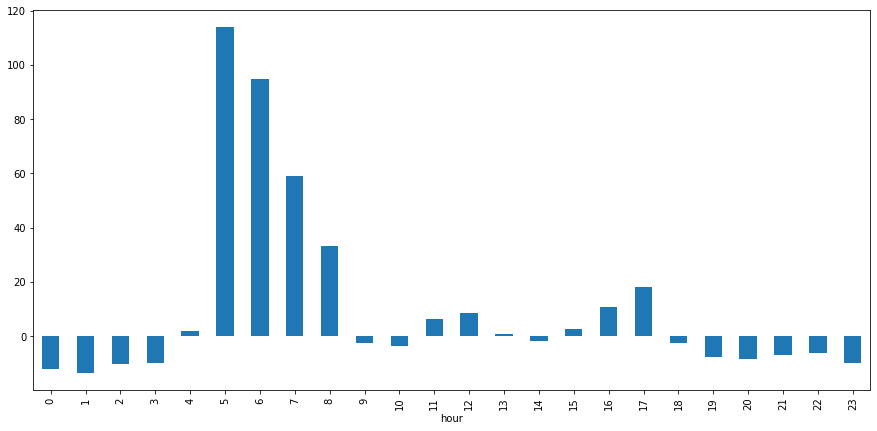

In [39]:
#% change in hourly rentals
df2['pct_change'] = df2['count'].pct_change().mul(50)                              
df2.groupby(['hour']).agg(np.mean)['pct_change'].plot(kind='bar');


--> new variables to consider: `['%_change_positive']`, `['TOP_%_change_positive']`, `['%_change_negative']`

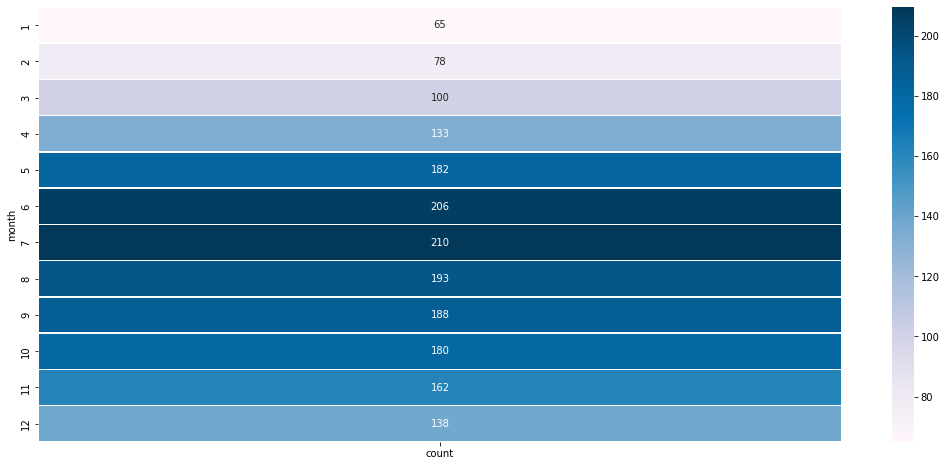

In [40]:
plt.figure(figsize=(18,8))
df_month_count_med = df2.groupby('month')[['count']].median()
df_month_count_med = df_month_count_med.sort_values('month', ascending=True)
sns.heatmap(df_month_count_med, annot=True, fmt='.0f', linewidths=.5, cmap='PuBu'); 

--> New variable to cosider: `['TOP_MONTH']`

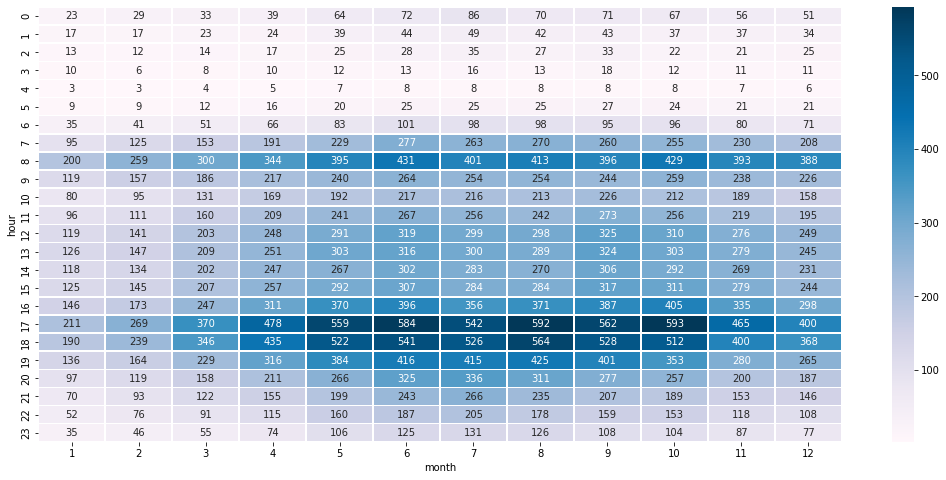

In [41]:
plt.figure(figsize=(18,8))
df_hour_month_count = df2.groupby(['hour', 'month'])[['count']].mean()
df_hour_month_count = df_hour_month_count.reset_index().pivot('hour', 'month', 'count')
sns.heatmap(df_hour_month_count, annot=True, fmt='.0f', linewidths=.5, cmap="PuBu"); 

## HOLIDAY / WORKINGDAY

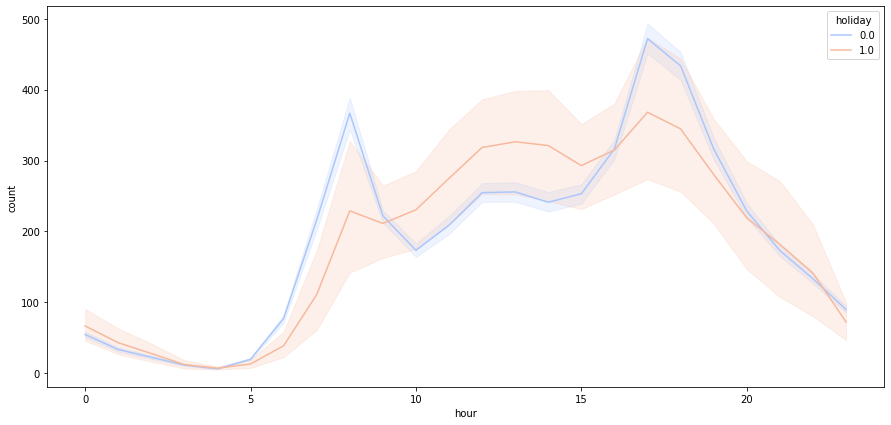

In [42]:
plt.rcParams["figure.figsize"] = (15, 7)
sns.lineplot(data=df2[df2['is_train']==True], x="hour", y="count", hue="holiday", palette="coolwarm")

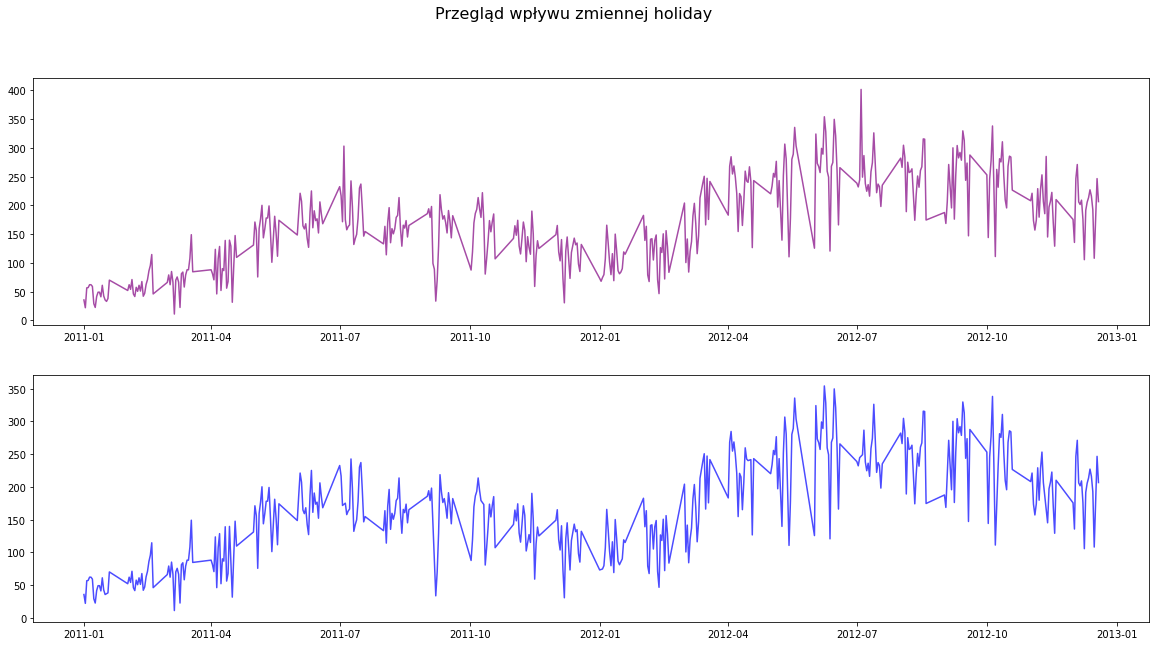

In [43]:
plt.figure(figsize=(20,10))

df2_train_date_median = df2[df2['is_train']==True].groupby('date')['count'].median()
df2_train_date_nohol_median = df2[(df2['is_train']==True) & (~df2['holiday'].astype(int))].groupby('date')['count'].median()

plt.subplot(211) 
plt.plot(df2_train_date_median.index, df2_train_date_median, alpha=0.7, color='purple')
plt.subplot(212)
plt.plot(df2_train_date_nohol_median.index, df2_train_date_nohol_median, alpha=0.7, color='blue')

plt.suptitle('Przegląd wpływu zmiennej holiday', fontsize=16)
plt.show()

--> noticeable increases around the beginning of July and October

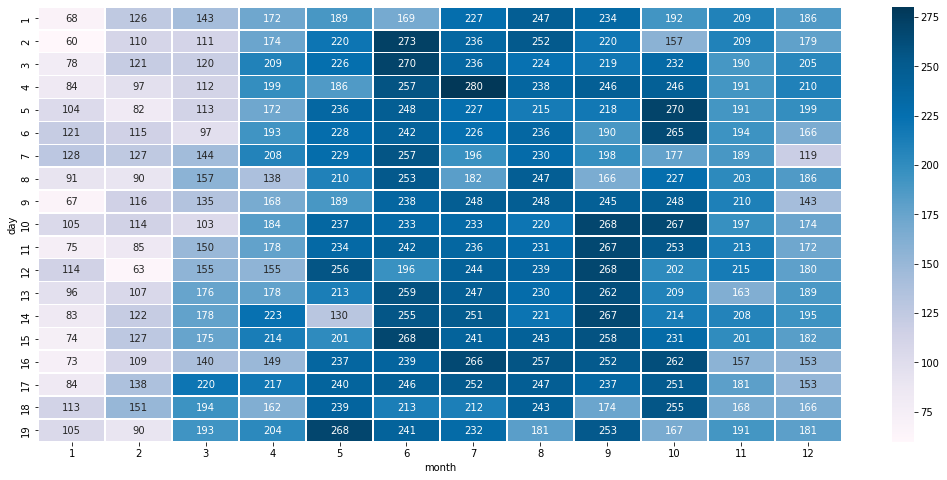

In [44]:
plt.figure(figsize=(18,8))
df_day_month_count = df2[df2['is_train']==True].groupby(['day', 'month'])[['count']].mean()
df_day_month_count = df_day_month_count.reset_index().pivot('day', 'month', 'count')
sns.heatmap(df_day_month_count, annot=True, fmt='.0f', linewidths=.5, cmap="PuBu"); 

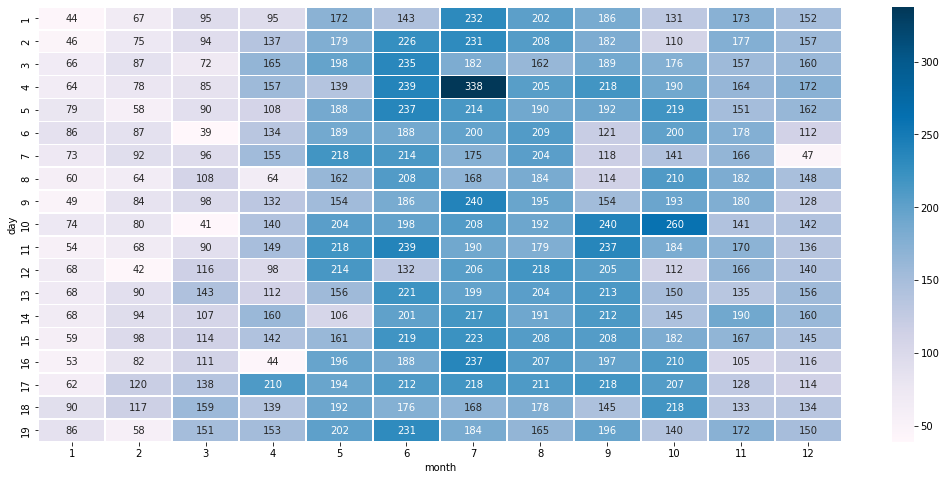

In [45]:
plt.figure(figsize=(18,8))
df_day_month_count_median = df2[df2['is_train']==True].groupby(['day', 'month'])[['count']].median()
df_day_month_count_median = df_day_month_count_median.reset_index().pivot('day', 'month', 'count')
sns.heatmap(df_day_month_count_median, annot=True, fmt='.0f', linewidths=.5, cmap="PuBu"); 

--> Data from USA - high increase in number of rentals 04.07.- Independant Day and 10.10 - Columbus Day

In [46]:
#list of holiday days
pd.DataFrame(df2[df2['holiday']==1]['date'].unique()).sort_values(by=0)

,0
0,2011-01-17
1,2011-02-21
2,2011-04-15
3,2011-05-30
4,2011-07-04
5,2011-09-05
6,2011-10-10
7,2011-11-11
8,2011-11-24
9,2011-12-26


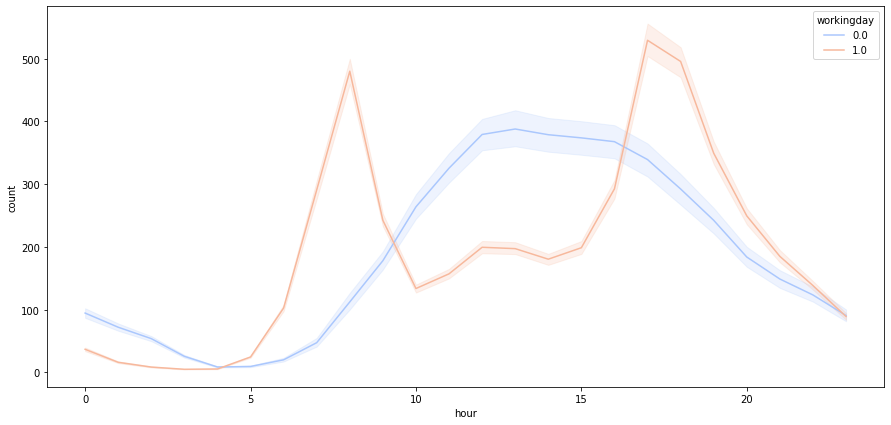

In [47]:
sns.lineplot(data=df2[df2['is_train']==True], x="hour", y="count", hue="workingday", palette="coolwarm")

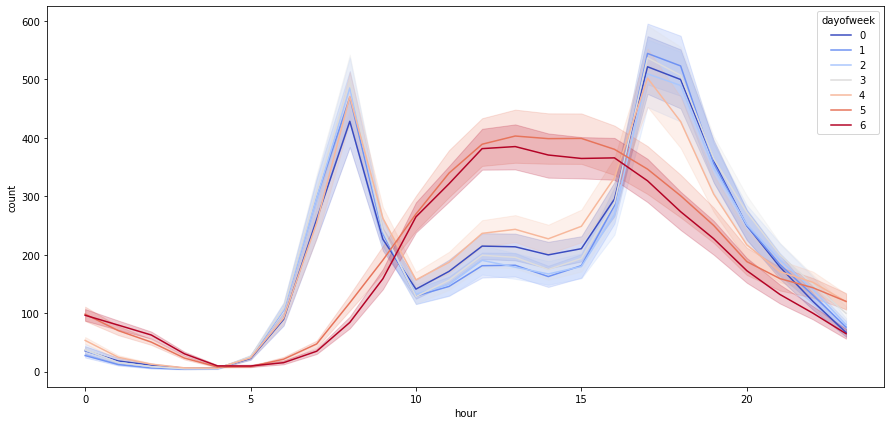

In [48]:
sns.lineplot(data=df2[df2['is_train']==True], x="hour", y="count", hue="dayofweek", palette="coolwarm")

--> more rentals between 0:00 and 4:00, less in the morning and evening at weekends, with peaks around 8:00 and in the afternoon between 5:00 and 7:00 p.m.

--> new features to consider: `TOP_WEEKEND_HOUR`, `TOP_WORKINGDAY_HOUR`

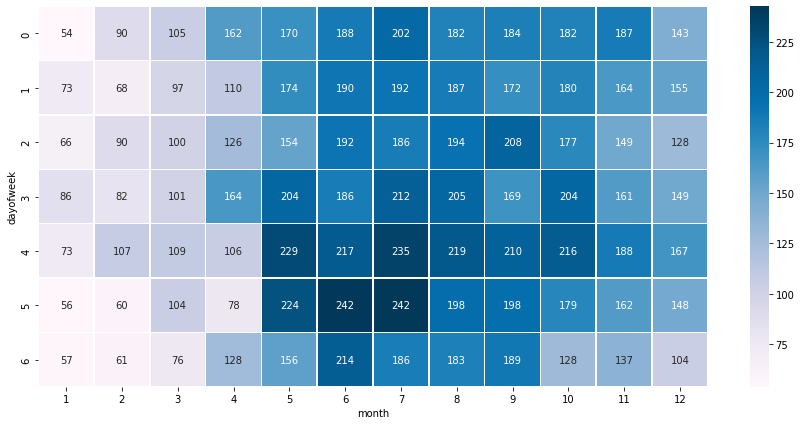

In [49]:
df_wday_month_count_median = df2[df2['is_train']==True].groupby(['dayofweek', 'month'])[['count']].median()
df_wday_month_count_median = df_wday_month_count_median.reset_index().pivot('dayofweek', 'month', 'count')
sns.heatmap(df_wday_month_count_median, annot=True, fmt='.0f', linewidths=.5, cmap="PuBu"); 

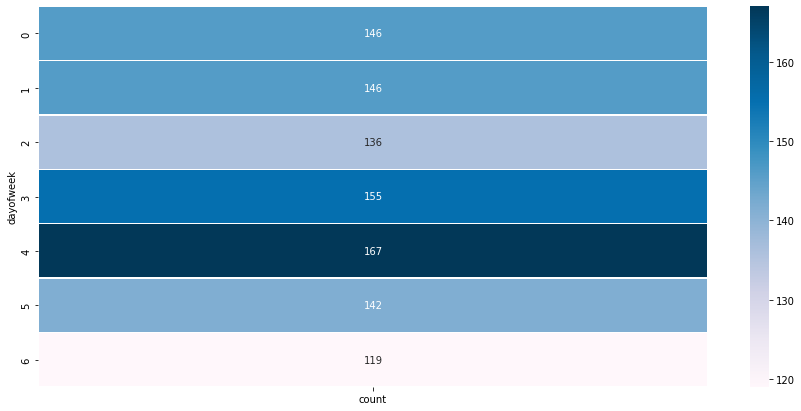

In [50]:
df_dayofweek_count_med = df2.groupby('dayofweek')[['count']].median()
df_dayofweek_count_med = df_dayofweek_count_med.sort_values('dayofweek', ascending=True)
sns.heatmap(df_dayofweek_count_med, annot=True, fmt='.0f', linewidths=.5, cmap="PuBu"); 

--> New variable to consider: `['TOP_WEEKDAY']`

## SEASON / WEATHER  
> 1 = spring, 2 = summer, 3 = fall, 4 = winter
 



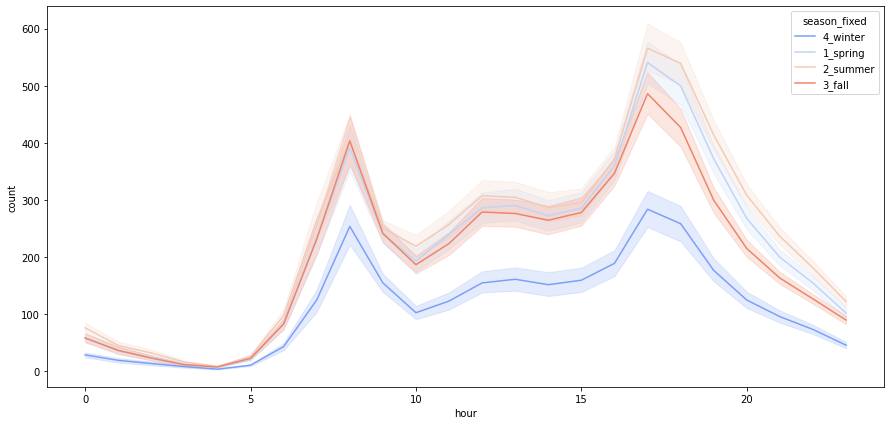

In [51]:
sns.lineplot(data=df2[df2['is_train']==True], x="hour", y="count", hue="season_fixed", palette="coolwarm")

--> New variable to consider: `['TOP_SEASON']`

Weather:

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

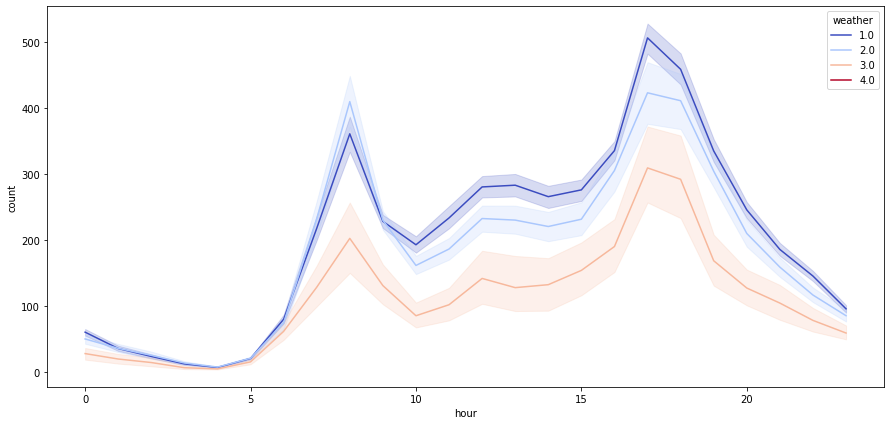

In [52]:
sns.lineplot(data=df2[df2['is_train']==True], x="hour", y="count", hue="weather", palette="coolwarm")

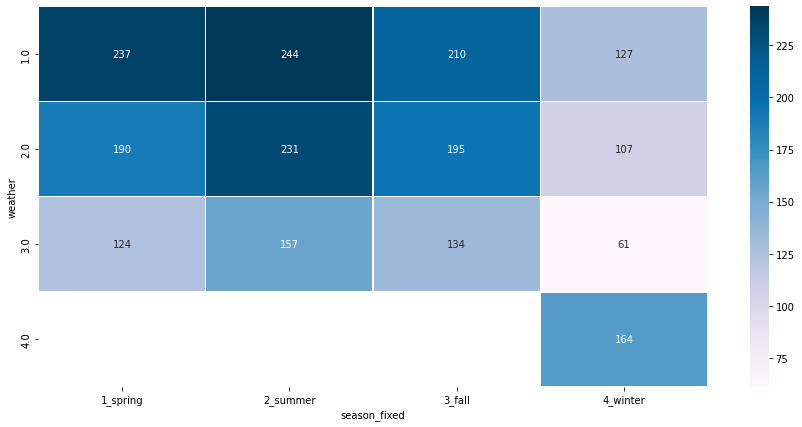

In [53]:
df_wday_month_count_median = df2[df2['is_train']==True].groupby(['weather', 'season_fixed'])[['count']].mean()
df_wday_month_count_median = df_wday_month_count_median.reset_index().pivot('weather', 'season_fixed', 'count')
sns.heatmap(df_wday_month_count_median, annot=True, fmt='.0f', linewidths=.5, cmap="PuBu"); 

--> necessary to checkweather =4 i season =4 !!!

## TEMP / ATEMP / HUMIDITY

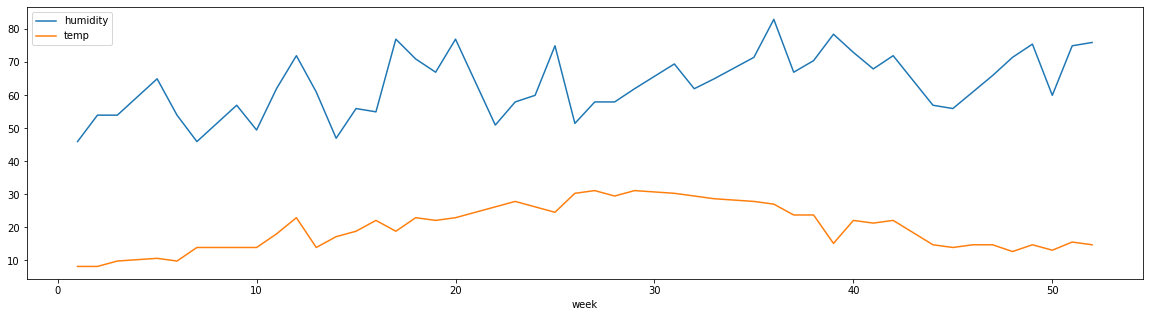

In [54]:
df2[df2['is_train']==True].groupby('week')[['humidity', 'temp']].median().plot(figsize=(20,5))

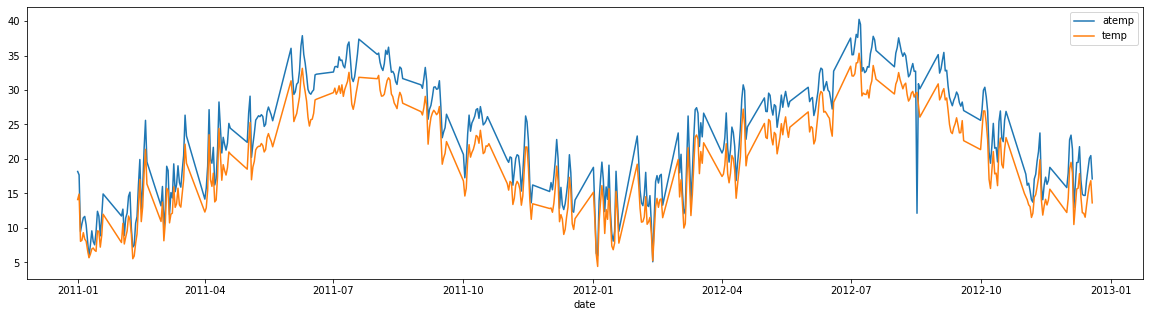

In [55]:
df2[df2['is_train']==True].groupby('date')[['atemp', 'temp']].mean().plot(figsize=(20,5))

--> new variable to consider: average of actual and perceived temperature`['AVG_TEMP']`

--> necessary to check what's going on around 2012-08/09 !!!

## Decomposition of a time series

In [56]:
df2_1m = df2.resample('1M', on='datetime').mean()

In [57]:
df2_1m['count']

datetime
2011-01-31     54.645012
2011-02-28     73.641256
2011-03-31     86.849776
2011-04-30    111.026374
2011-05-31    174.809211
2011-06-30    196.877193
2011-07-31    203.614035
2011-08-31    182.666667
2011-09-30    174.622517
2011-10-31    174.773626
2011-11-30    155.458333
2011-12-31    134.173246
2012-01-31    124.353201
2012-02-29    145.646154
2012-03-31    208.276923
2012-04-30    257.455947
2012-05-31    264.109649
2012-06-30    287.186404
2012-07-31    267.037281
2012-08-31    285.570175
2012-09-30    292.598684
2012-10-31    280.508772
2012-11-30    231.980220
2012-12-31    217.054825
Freq: M, Name: count, dtype: float64

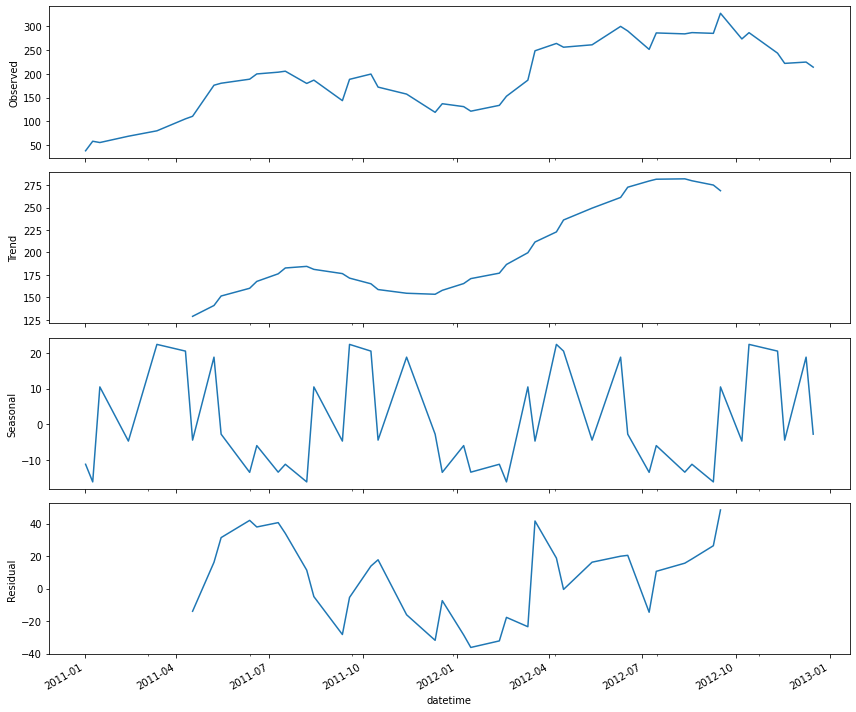

In [58]:
rcParams['figure.figsize'] = 12, 10
df2_1m = df2.resample('1w', on='datetime').mean()

decomposition = sm.tsa.seasonal_decompose(x=df2_1m[df2_1m['is_train']==True]['count'], model="additive", freq=12)
fig = decomposition.plot()
plt.show()


--> New variable to consider: `['TREND']` ?


In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      17379 non-null  datetime64[ns]
 1   season        17379 non-null  float64       
 2   holiday       17379 non-null  float64       
 3   workingday    17379 non-null  float64       
 4   weather       17379 non-null  float64       
 5   temp          17379 non-null  float64       
 6   atemp         17379 non-null  float64       
 7   humidity      17379 non-null  float64       
 8   windspeed     17379 non-null  float64       
 9   count         10886 non-null  float64       
 10  is_train      17379 non-null  float64       
 11  day           17379 non-null  int64         
 12  week          17379 non-null  int64         
 13  month         17379 non-null  int64         
 14  year          17379 non-null  int64         
 15  hour          17379 non-null  int64 

In [64]:
df2[ df2["count"].notnull() ].to_csv("data/FE_train.csv", index=False)

In [65]:
df2[ df2["count"].isnull() ].to_csv("data/FE_test_.csv", index=False)